In [71]:
# import libraries
import requests
from bs4 import BeautifulSoup

import functools as ft
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

This code extracts the names brands of Logic Harmony's HTML and stores in a list called brands. It's using the cruelty-free brands list. Each list is stored as an <li> tag withing a specific section of the webpage. (<div class="entry-content">)
    
The code then uses the requests library to send an HTTP GET request to the webpage URL, and then uses Beautiful Soup library to parse the HTML cntent of the response text. It then finds all of the <li> tags within the section of the webpage, extracts the text content of each one using .text and appends it the the brands list.

The list of the brands is printed and show how many brands were extracted from the webpage - 934.

In [72]:


r = requests.get("https://logicalharmony.net/cruelty-free-brand-list/")
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []

# create another list that will contain each list item still with the tags
rows = []

# get all list tags in entry-content part of the page (found by inspecting site)
brand_section1 = soup.find(class_='entry-content')
for brand in brand_section1.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    # keep the tags info in this list
    rows.append(brand)
    
len(brands)
    

934

Creating a pandas DataFrame that contains a single column name "Brand_info", which is populated with the list of brands scraped from a website. It then saves this DataFrame as a csv file in the specified directory. df.head() dispays the forst 5 rows.

In [73]:
# create dataframe - start with just brands list, then adjust
df = pd.DataFrame({'Brand_info': brands})   
df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/brands.csv', index=False)
df.head()

,Brand_info
0,If a brand is completely vegan “100% Vegan” ne...
1,It is noted if a brand is cruelty-free but is ...
2,"To help make shopping easier, I try to link to..."
3,100% Pure
4,100BON – 100% vegan


There is header information explaining the list so I removed the first three rows to jsut get the brand list.

In [74]:
# The first three will always be her directions, so drop those rows
df = df.iloc[3:].reset_index(drop=True)
df.head()

,Brand_info
0,100% Pure
1,100BON – 100% vegan
2,1121 Apothecary – 100% vegan
3,21 Drops – 100% vegan
4,2B


This adds three new columns do the existing data frame.
The first column is all vegan which checks if the string is 100% vegan using str.contains. This data goes in the brand_info column. The value will be true is the product is 100% vegan.

The second column is called partial_vegan as it checks is the string vegan product

In [75]:
# create a new column that tells whether or not a product is vegan
df['All_vegan'] = df['Brand_info'].str.contains('100% vegan')
df['Partial_vegan'] = df['Brand_info'].str.contains('vegan product', case=False)


In [76]:
print(df.All_vegan.sum())
print(df.Partial_vegan.sum())

df.head()

377
3


,Brand_info,All_vegan,Partial_vegan
0,100% Pure,False,False
1,100BON – 100% vegan,True,False
2,1121 Apothecary – 100% vegan,True,False
3,21 Drops – 100% vegan,True,False
4,2B,False,False


In [77]:
df['Brand_info'].str.contains('parent company').sum()


0

In [78]:
# create a column that tells if a brand is owned by a company that is NOT cruelty free
df['Bad_parent_company'] = df['Brand_info'].str.contains('Parent company', case=False)

In [79]:
df.head()

,Brand_info,All_vegan,Partial_vegan,Bad_parent_company
0,100% Pure,False,False,False
1,100BON – 100% vegan,True,False,False
2,1121 Apothecary – 100% vegan,True,False,False
3,21 Drops – 100% vegan,True,False,False
4,2B,False,False,False


In [80]:
df['Brand_info'].str.contains('Black-owned', case=False).sum()

52

In [81]:
# create a column that tells if the company is black-owned
df['Black_owned'] = df['Brand_info'].str.contains('Black-owned', case=False)
df.head()

,Brand_info,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False,False
1,100BON – 100% vegan,True,False,False,False
2,1121 Apothecary – 100% vegan,True,False,False,False
3,21 Drops – 100% vegan,True,False,False,False
4,2B,False,False,False,False


In [82]:
# start to simplify the company name by removing attributes already noted in new columns
brand_df = df.copy() 
brand_df['Brand_info'].str.contains('–')

0      False
1       True
2       True
3       True
4      False
       ...  
926    False
927    False
928    False
929    False
930     True
Name: Brand_info, Length: 931, dtype: bool

In [83]:
brand_df.rename(columns={'Brand_info':'Brand'}, inplace=True)
brand_df.head()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False,False
1,100BON – 100% vegan,True,False,False,False
2,1121 Apothecary – 100% vegan,True,False,False,False
3,21 Drops – 100% vegan,True,False,False,False
4,2B,False,False,False,False


In [84]:
brand_df['Brand'] = brand_df['Brand'].str.split('–').str[0]
brand_df.head(10)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False,False
1,100BON,True,False,False,False
2,1121 Apothecary,True,False,False,False
3,21 Drops,True,False,False,False
4,2B,False,False,False,False
5,2nd KIND,True,False,False,False
6,"7 Virtues, The",True,False,False,False
7,8 Greens,False,False,False,False
8,,False,False,False,False
9,A Girl’s Gotta Spa,True,False,False,False


In [85]:
brand_df['Brand'].str.contains(re.escape('(')).sum()

15

In [86]:
brand_df[brand_df['Brand'].str.contains(re.escape('('))]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
84,"Balm, The (theBalm)",False,False,False,False
139,Bossy Cosmetics (Bossy Lipstick),False,False,False,True
246,Earth Friendly Products (ECOS),False,False,False,False
256,ELF (Eyes Lips Face/E.L.F.),True,False,False,False
267,EOS (Evolution of Smooth),False,False,False,False
363,Hero Cosmetics (also known as Mighty Patch),False,False,False,False
465,La Couleur Couture (LACC),True,False,False,False
485,LH Cosmetics (Linda Hallberg Cosmetics),False,False,False,False
570,MOMMA (Ministry of Mineral Makeup Australia),True,False,False,False
577,MOX (Moxe Aromatherapy),False,False,False,False


In [87]:
brand_df[brand_df.Partial_vegan]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
370,Hourglass,False,True,True,False
416,Jouer,False,True,False,False
626,NYX Cosmetics (NYX Cosmetics Vegan Product List),False,True,True,False


In [88]:
partial_veg_brands = brand_df[brand_df.Partial_vegan]['Brand'].str.split(re.escape('(')).str[0]
partial_veg_brands

370        Hourglass 
416            Jouer 
626    NYX Cosmetics 
Name: Brand, dtype: object

In [89]:
brand_df.loc[brand_df.Partial_vegan, 'Brand'] = partial_veg_brands
brand_df[brand_df['Brand'].str.contains(re.escape('('))]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
84,"Balm, The (theBalm)",False,False,False,False
139,Bossy Cosmetics (Bossy Lipstick),False,False,False,True
246,Earth Friendly Products (ECOS),False,False,False,False
256,ELF (Eyes Lips Face/E.L.F.),True,False,False,False
267,EOS (Evolution of Smooth),False,False,False,False
363,Hero Cosmetics (also known as Mighty Patch),False,False,False,False
465,La Couleur Couture (LACC),True,False,False,False
485,LH Cosmetics (Linda Hallberg Cosmetics),False,False,False,False
570,MOMMA (Ministry of Mineral Makeup Australia),True,False,False,False
577,MOX (Moxe Aromatherapy),False,False,False,False


In [90]:
brand_df[brand_df.Partial_vegan]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
370,Hourglass,False,True,True,False
416,Jouer,False,True,False,False
626,NYX Cosmetics,False,True,True,False


In [91]:
# drop any accidentally empty rows (from blank bullet points on website)
brand_df = brand_df[brand_df.Brand != '']
brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False,False
1,100BON,True,False,False,False
2,1121 Apothecary,True,False,False,False
3,21 Drops,True,False,False,False
4,2B,False,False,False,False
5,2nd KIND,True,False,False,False
6,"7 Virtues, The",True,False,False,False
7,8 Greens,False,False,False,False
9,A Girl’s Gotta Spa,True,False,False,False
10,ABBA Pure Performance Hair Care,False,False,True,False


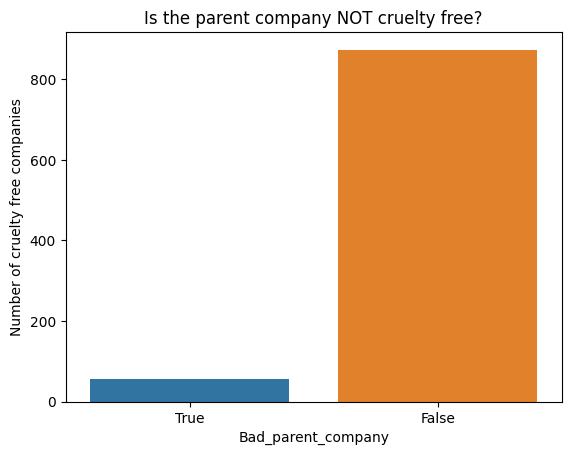

In [92]:
# import graphing packages
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.countplot(data=brand_df, x='Bad_parent_company', order=[True, False])
fig.set_title('Is the parent company NOT cruelty free?')
fig.set_ylabel('Number of cruelty free companies');

In [93]:
# now try with plotly
import plotly.express as px

fig = px.histogram(brand_df, x='Bad_parent_company', color="Black_owned", category_orders = {'Bad_parent_company':[True, False]}, title='Is the parent company NOT cruelty-free?')
fig.show();

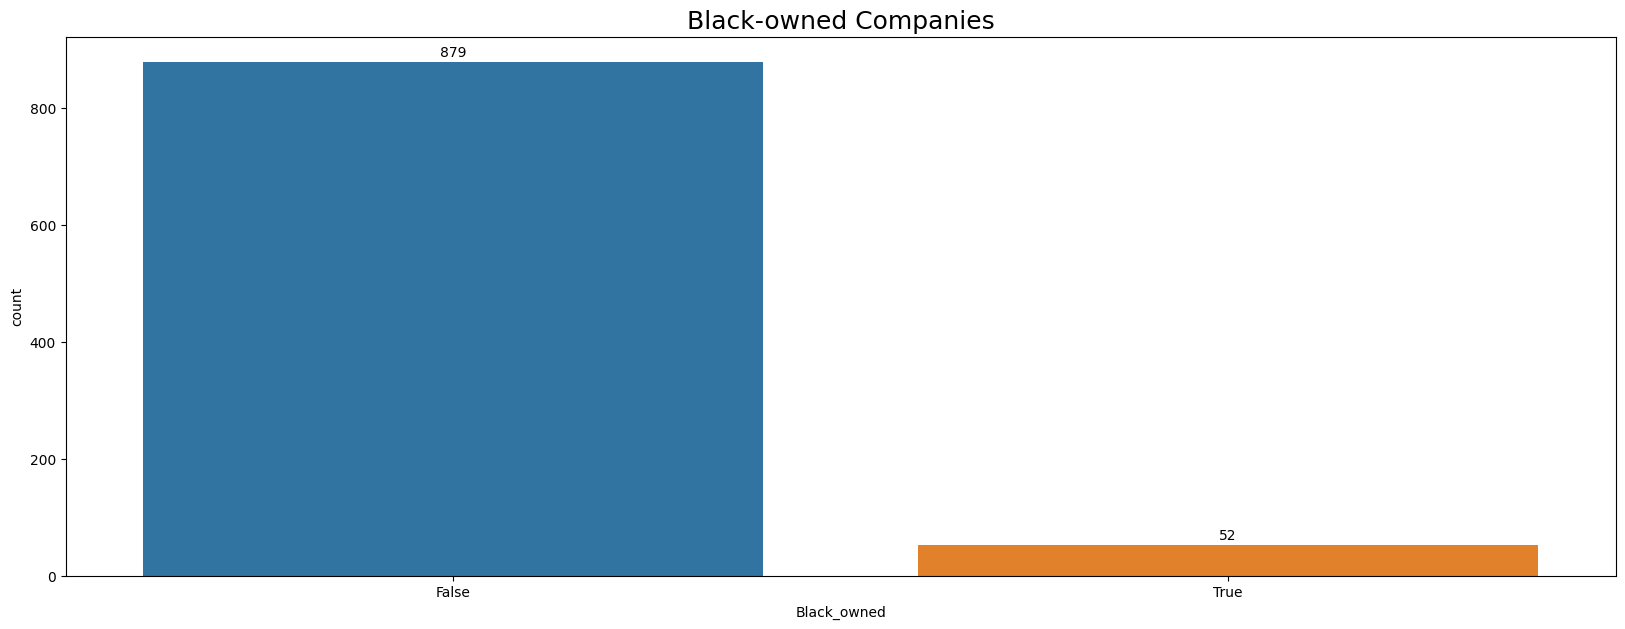

In [94]:
fig, ax1 = plt.subplots(figsize=(20,7))
graph = sns.countplot(ax=ax1,x='Black_owned', data=brand_df)
graph.set_title("Black-owned Companies", fontdict={'fontsize': 18})
# graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 10,
        df['Black_owned'].value_counts()[i],ha="center")
    i += 1

In [95]:
#fig = sns.countplot(data=brand_df, x='Black_owned', order=[True, False])
#fig.set_title('Is the company black-owned?')
#fig.set_ylabel('Black-owned companies');

In [96]:
# check out vegan brand values, along with which are black-owned
fig = px.histogram(brand_df, x='All_vegan', color="Black_owned", category_orders={'All_vegan': [True, False]}, title='Are these products 100% vegan?')
fig.show();

In [97]:
# are there any vegan brands owned by a company that is not cruelty free
brand_df[brand_df.All_vegan & brand_df.Bad_parent_company]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
219,dermaGEEK,True,False,True,False
254,Ecover,True,False,True,False
356,Hello Products,True,False,True,False
445,KKW Fragrance,True,False,True,False
461,Kylie Cosmetics,True,False,True,False
462,Kylie Skin,True,False,True,False
556,Method,True,False,True,False
649,"Ordinary, The",True,False,True,False
711,Pureology,True,False,True,False
758,Schmidt’s Naturals,True,False,True,False


In [98]:
fig = px.histogram(brand_df, x='Bad_parent_company', color='All_vegan', category_orders={'Bad_parent_company': [True, False]}, title='Brands with Parent Companies that are NOT Cruelty Free')
fig.show();

In [99]:
fig = px.histogram(brand_df, x='All_vegan', color='Bad_parent_company', category_orders={'All_vegan': [True, False]}, title='Is the brand vegan?')
fig.show();

In [100]:
# create dataframes with just each attribute
bad_co = brand_df[brand_df.Bad_parent_company]
vegan = brand_df[brand_df.All_vegan]   # we won't analyze brands with just a vegan sub-list of products
black = brand_df[brand_df.Black_owned]

In [101]:
veg_cf_black = brand_df[brand_df.All_vegan & brand_df.Black_owned & ~brand_df.Bad_parent_company]

In [102]:
for brand in veg_cf_black['Brand']:
    print(brand)
    
print('\nThere are {} companies that are vegan, black-owned, and do not have a parent company that participates in animal testing.'.format(len(veg_cf_black)))

Afrocenchix 
Dehiya 
Dimension Nails 
Dirt Don’t Hurt Me 
Jane Carter Solution 
LYS Beauty 
Mented Cosmetics 
Mocha Whip 
Nash + Pino 
OOO Polish (Triple O Polish) 
Pear Nova 
People of Color Beauty 
Sabreen Cosmetics 
September Rose Co 
Shimirose 
SIMKHA 

There are 16 companies that are vegan, black-owned, and do not have a parent company that participates in animal testing.


In [103]:
brand_df[brand_df.Black_owned]['Brand']

12                           Ace Beaute 
20                          Aeva Beauty 
21                          Afrocenchix 
41                          Anita Grant 
98                 BeautyStat Cosmetics 
99                       Beauty Bakerie 
103                     Beauty By Stony 
134                     Bold Brand, The 
139    Bossy Cosmetics (Bossy Lipstick) 
186            Coloured Raine Cosmetics 
213                              Dehiya 
228                     Dimension Nails 
229                  Dirt Don’t Hurt Me 
240                           DSMD Shop 
272                            Eu’Genia 
322                            Glamlite 
368                   Honey Pot Co, The 
400                Jane Carter Solution 
424                     Kalon Kosmetics 
442                    Kitaka of London 
446                   Klarity Kosmetics 
471                       Lamain Beauty 
472                        Lamik Beauty 
482                      Leilano Beauty 
497             

In [104]:
brand_df[brand_df.Bad_parent_company]['Brand']

10     ABBA Pure Performance Hair Care 
70                               Aveda 
71                        Awake Beauty 
85                        bareMinerals 
144                            Briogeo 
151                        Burt’s Bees 
153                              Buxom 
160                            Caldrea 
167                        Certain Dri 
171               Chemistry Brand, The 
197                          COVERGIRL 
218            Dermablend Professional 
219                          dermaGEEK 
220                        Dermalogica 
223                           DevaCurl 
225                               Dial 
238                     Drunk Elephant 
254                             Ecover 
289                            Farmacy 
297                       Flesh Beauty 
315                            Garnier 
356                     Hello Products 
370                          Hourglass 
377                           Hylamide 
397                       IT Cosmetics 


In [105]:
ulta_url = 'https://logicalharmony.net/cruelty-free-brands-at-ulta/'

r = requests.get(ulta_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

165

In [106]:
ulta_df = pd.DataFrame({'Brand_info': brands})
#ulta_df.shape

In [107]:
def add_booleans(df):
    # df will have one column called Brand_info
    # if it has 100% vegan after the name, it will be classified All_vegan
    # if it has a link to vegan products of the brand, it will be classified Partial_vegan
    
    # create a new column that tells whether or not a product is vegan
    df['All_vegan'] = df['Brand_info'].str.contains('100% vegan')
    df['Partial_vegan'] = df['Brand_info'].str.contains('vegan product', case=False)
    
    #print(df.head())
    
    # create a column that tells if a brand is owned by a company that is NOT cruelty free
    df['Bad_parent_company'] = df['Brand_info'].str.contains('parent company', case=False)
    
    # create a column that tells if the company is black-owned
    df['Black_owned'] = df['Brand_info'].str.contains('Black-owned', case=False)
    
    # drop any accidentally empty rows (from blank bullet points on website)
    df = df[df.Brand_info != '']
    
    return(df)
    
ulta_brand_df = add_booleans(ulta_df)  

ulta_brand_df.shape

(165, 5)

In [108]:
# re has been imported

def clean_up_brands(df):
    # this will be run on a dataframe with column Brand_info
    # simplify the company name by removing attributes already noted in new columns
    brand_df = df.copy() 
    
    brand_df.rename(columns={'Brand_info':'Brand'}, inplace=True)
    
    # most of the extra information comes after a "long" hyphen, which has been copied and pasted here
    brand_df['Brand'] = brand_df['Brand'].str.split('–').str[0]
    
    # if a brand has only some vegan items, that is designated in parentheses before the long hyphen
    # so we will get rid of that if necessary here
    partial_veg_brands = brand_df[brand_df.Partial_vegan]['Brand'].str.split(re.escape('(')).str[0]
    brand_df.loc[brand_df.Partial_vegan, 'Brand'] = partial_veg_brands
    
    return brand_df

In [109]:
ulta_brand_df = clean_up_brands(ulta_brand_df)
ulta_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned
0,About Face,True,False,False,False
1,Ace Beauté,False,False,False,False
2,ACURE,True,False,False,False
3,AG Care,True,False,False,False
4,Anastasia Beverly Hills,False,False,False,False
5,Andalou Naturals,False,False,False,False
6,Aquis,False,False,False,False
7,Arctic Fox,True,False,False,False
8,Ardell,False,False,False,False
9,Ariana Grande,False,False,False,False


In [110]:
# check to make sure parentheses are still there if they are part of the brand name
ulta_brand_df[ulta_brand_df['Brand'].str.contains(re.escape('('))]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned


In [111]:
# add a column to indicate this item is sold at Ulta 
# once this is merged, if an item is not sold at Ulta, it will have a 0 in that column
ulta_brand_df['Ulta'] = 1
ulta_brand_df.head()

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta
0,About Face,True,False,False,False,1
1,Ace Beauté,False,False,False,False,1
2,ACURE,True,False,False,False,1
3,AG Care,True,False,False,False,1
4,Anastasia Beverly Hills,False,False,False,False,1


In [112]:
sephora_url = 'https://logicalharmony.net/cruelty-free-brands-at-sephora/'

r = requests.get(sephora_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

101

In [113]:
# make the Sephora dataframe
sephora_df = pd.DataFrame({'Brand_info': brands})

# add the columns then clean the brand names
sephora_brand_df = add_booleans(sephora_df) 
sephora_brand_df = clean_up_brands(sephora_brand_df)

# add column for merging later that indicates this brand is sold at Sephora
sephora_brand_df['Sephora'] = 1

sephora_brand_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/sephora_brands.csv', index=False)
sephora_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Sephora
0,"7 Virtues, The",True,False,False,False,1
1,8 Greens,False,False,False,False,1
2,Adwoa Beauty,False,False,False,False,1
3,Alpyn Beauty,False,False,False,False,1
4,Amika,False,False,False,False,1
5,Anastasia Beverly Hills,False,False,False,False,1
6,Antonym,False,False,False,False,1
7,Aquis,False,False,False,False,1
8,Athr Beauty (formerly Aether Beauty),True,False,False,False,1
9,Aveda 100% vegan,True,False,True,False,1


In [114]:
# load the sephora brands dataframe
sephora_brand_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/sephora_brands.csv')

# filter for all vegan or partially vegan brands
vegan_brands = sephora_brand_df[(sephora_brand_df['All_vegan'] == True)]

# filter for only Sephora brands
vegan_sephora_brands = vegan_brands[vegan_brands['Sephora'] == 1]

# display the resulting dataframe
vegan_sephora_brands

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Sephora
0,"7 Virtues, The",True,False,False,False,1
8,Athr Beauty (formerly Aether Beauty),True,False,False,False,1
9,Aveda 100% vegan,True,False,True,False,1
15,Biossance,True,False,False,False,1
16,Bite Beauty,True,False,False,False,1
22,Ceremonia,True,False,False,False,1
26,COVER FX,True,False,False,False,1
34,FARSÁLI,True,False,False,False,1
36,Fenty Skin,True,False,False,False,1
37,Floral Street,True,False,False,False,1


In [115]:
sephora_brand_df[sephora_brand_df.Brand.str.contains('vegan')]

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Sephora
9,Aveda 100% vegan,True,False,True,False,1
35,Fenty Beauty (list of Fenty Beauty vegan options),False,False,False,False,1


In [116]:
# hopefully this is the only "goof" - it was missed because there was no long hyphen
sephora_brand_df.iloc[9,0] = 'Aveda'

sephora_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Sephora
0,"7 Virtues, The",True,False,False,False,1
1,8 Greens,False,False,False,False,1
2,Adwoa Beauty,False,False,False,False,1
3,Alpyn Beauty,False,False,False,False,1
4,Amika,False,False,False,False,1
5,Anastasia Beverly Hills,False,False,False,False,1
6,Antonym,False,False,False,False,1
7,Aquis,False,False,False,False,1
8,Athr Beauty (formerly Aether Beauty),True,False,False,False,1
9,Aveda,True,False,True,False,1


In [117]:
beauty_bay_url = 'https://logicalharmony.net/cruelty-free-brands-at-beauty-bay/'

r = requests.get(beauty_bay_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

40

In [118]:
# make the Beauty Bay dataframe
bb_df = pd.DataFrame({'Brand_info': brands})

# add the columns then clean the brand names
bb_brand_df = add_booleans(bb_df) 
bb_brand_df = clean_up_brands(bb_brand_df)

# add column for merging later that indicates this brand is sold at Beauty Bay
bb_brand_df['Beauty_Bay'] = 1
bb_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/Beauty_Bay.csv', index=False)
bb_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Beauty_Bay
0,Anastasia Beverly Hills,False,False,False,False,1
1,Ardell,False,False,False,False,1
2,Bdellium Tools,False,False,False,False,1
3,beautyblender,False,False,False,False,1
4,"Beauty Chef, The",False,False,False,False,1
5,Blinc,False,False,False,False,1
6,Coloured Raine,False,True,False,False,1
7,Cover FX,True,False,False,False,1
8,Dose of Colors,False,False,False,False,1
9,Eye of Horus,False,False,False,False,1


In [119]:
# merge them all with merge_ordered
merge2 = ft.reduce(lambda left, right: pd.merge_ordered(left, right, on=['Brand', 'All_vegan', 'Partial_vegan', 'Bad_parent_company', 'Black_owned'], suffixes=('_left', '_right')), dfs)
merge2.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/merged_brands.csv', index=False)
merge2.head(30)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Ulta,Sephora,Beauty_Bay,Cult_Beauty,Nordstrom
0,100% Pure,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,100BON,True,False,False,False,NaN,NaN,NaN,NaN,NaN
2,1121 Apothecary,True,False,False,False,NaN,NaN,NaN,NaN,NaN
3,21 Drops,True,False,False,False,NaN,NaN,NaN,NaN,NaN
4,2B,False,False,False,False,NaN,NaN,NaN,NaN,NaN
5,2nd KIND,True,False,False,False,NaN,NaN,NaN,NaN,NaN
6,"7 Virtues, The",True,False,False,False,NaN,1.0,NaN,NaN,NaN
7,8 Greens,False,False,False,False,NaN,1.0,NaN,NaN,NaN
8,A Girl’s Gotta Spa,True,False,False,False,NaN,NaN,NaN,NaN,NaN
9,ABBA Pure Performance Hair Care,False,False,True,False,NaN,NaN,NaN,NaN,NaN


In [120]:
cult_beauty_url = 'https://logicalharmony.net/cruelty-free-brands-at-cult-beauty/'

r = requests.get(cult_beauty_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

49

In [121]:
# make the Cult Beauty dataframe
cb_df = pd.DataFrame({'Brand_info': brands})

# add the columns then clean the brand names
cb_brand_df = add_booleans(cb_df) 
cb_brand_df = clean_up_brands(cb_brand_df)

# add column for merging later that indicates this brand is sold at Cult Beauty
cb_brand_df['Cult_Beauty'] = 1

cb_brand_df.head(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Cult_Beauty
0,Anastasia Beverly Hills,False,False,False,False,1
1,"Beauty Chef, The",False,False,False,False,1
2,beautyblender,False,False,False,False,1
3,BECCA Cosmetics,False,True,True,False,1
4,Bio Ionic,False,False,False,False,1
5,Briogeo,False,False,True,False,1
6,COOLA Suncare,False,True,False,False,1
7,Charlotte Tilbury,False,True,False,False,1
8,Cover FX,True,False,False,False,1
9,Dr. Roebuck’s,False,False,False,False,1


In [122]:
nordstrom_url = 'https://logicalharmony.net/cruelty-free-brands-at-nordstrom/'

r = requests.get(nordstrom_url)
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []


# get all list tags in entry-content part of the page (found by inspecting site)
step1 = soup.find(class_='entry-content')

good_brands = step1.find('ul')

for brand in good_brands.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    
len(brands)

52

In [123]:
# make the Nordstrom dataframe
nordstrom_df = pd.DataFrame({'Brand_info': brands})

# add the columns then clean the brand names
nordstrom_brand_df = add_booleans(nordstrom_df) 
nordstrom_brand_df = clean_up_brands(nordstrom_brand_df)

# add column for merging later that indicates this brand is sold at Nordstrom
nordstrom_brand_df['Nordstrom'] = 1

nordstrom_brand_df.tail(12)

,Brand,All_vegan,Partial_vegan,Bad_parent_company,Black_owned,Nordstrom
40,RMS Beauty,False,False,False,False,1
41,Sigma Beauty,False,False,False,False,1
42,Smashbox,False,True,True,False,1
43,Stila,False,False,False,False,1
44,StriVectin,False,False,False,False,1
45,Sunday Riley,False,False,False,False,1
46,Supergoop!,False,False,False,False,1
47,T3,False,False,False,False,1
48,Tata Harper,False,True,False,False,1
49,Too Faced,False,True,True,False,1


In [124]:
print(merged_brands_df.head)

NameError: name 'merged_brands_df' is not defined

In [ ]:
# # to merge all dataframes on Brand (on the occasion they are named the same)
# dfs = [brand_df, ulta_brand_df, sephora_brand_df, bb_brand_df, cb_brand_df, nordstrom_brand_df]

# # merge them all
# import functools as ft
# merge1 = ft.reduce(lambda left, right: pd.merge(left, right, on='Brand'), dfs)

# merge1.head()

# to merge all dataframes on Brand (on the occasion they are named the same)
dfs = [brand_df, ulta_brand_df, sephora_brand_df, bb_brand_df, cb_brand_df, nordstrom_brand_df]


merge1 = ft.reduce(lambda left, right: pd.merge(left, right, on='Brand', suffixes=('_left', '_right')), dfs)

merge1.head()



In [ ]:
# merge2 = ft.reduce(lambda left, right: pd.merge_ordered(left, right, on=['Brand', 'All_vegan', 'Partial_vegan', 'Bad_parent_company', 'Black_owned']), dfs)

# merge2.head()
# merge them all with merge_ordered
merge2 = ft.reduce(lambda left, right: pd.merge_ordered(left, right, on=['Brand', 'All_vegan', 'Partial_vegan', 'Bad_parent_company', 'Black_owned'], suffixes=('_left', '_right')), dfs)
merge2.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/merged_brands.csv', index=False)
merge2.head()

In [ ]:
merge3.iloc[390:395, :]

In [ ]:
merge3.Brand.value_counts()

In [ ]:
# first remove leading and trailing spaces
merge3['Brand'] = merge3['Brand'].str.strip()
merge3.Brand.value_counts()

In [ ]:
dup_df = merge3.groupby('Brand').filter(lambda g: g.Brand.size > 1)
# using this line below to help
# df.groupby("column3").filter(lambda g: (g.name != 0) and (g.column3.size >= 3))
dup_df

In [ ]:
# the 2021 Ulta update has Axiology as all vegan
# keep 80 and drop 79
merge3.iloc[80,9] = 1
merge3.drop(79, inplace=True)
dup_df.drop([79,80], inplace=True)
display(merge3.iloc[78:81])
dup_df

In [ ]:
# bare minerals now has some vegan products
merge3.iloc[999:1002]

In [ ]:
# Okay, so the dup_df is helpful, but has still missed some entries, so I'll just use it as an initial guide
merge3.iloc[995:1005]

In [ ]:
# bare Minerals now has a vegan product list
merge3.iloc[999,[5,9]]=1
merge3.iloc[999]

In [ ]:
merge3.drop([998,1000,1001], inplace=True)
merge3.iloc[997:1003]

In [ ]:
merge3 = merge3.reset_index(drop=True)
merge3.iloc[997:1003]

In [ ]:
dup_df = merge3.groupby('Brand').filter(lambda g: g.Brand.size > 1)
# using this line below to help
# df.groupby("column3").filter(lambda g: (g.name != 0) and (g.column3.size >= 3))
dup_df

In [ ]:
dup_df.drop([998,999,1000], inplace=True)
dup_df.tail()

In [ ]:
merge3.iloc[943, [5,8]] = 1

In [ ]:
merge3.drop([941,942], inplace=True)
merge3.reset_index(drop=True)
merge3.iloc[940:943]

In [ ]:
dup_df.drop([941,942,943], inplace=True)
dup_df.tail()

In [ ]:
merge3.iloc[935:943]

In [ ]:
# this is black-owned, created by a Nigerian-born woman
merge3.iloc[939,4] = True
merge3.iloc[935:943]

In [ ]:
merge3.drop(940, inplace=True)

In [ ]:
dup_df.drop([939,940], inplace=True)
dup_df.tail()

In [ ]:
# on 2020 Cult Beauty page, this is listed as all vegan
merge3.drop(934, inplace=True)
dup_df.drop([934,935], inplace=True)
dup_df.tail()

In [ ]:
# this does have a vegan product line
merge3.iloc[915,8] = 1
merge3.drop([913,914], inplace=True)
dup_df.drop([913,914,915], inplace=True)
dup_df.tail()

In [ ]:
merge3.drop(899, inplace=True)
dup_df.drop([899,900], inplace=True)
dup_df.tail()

In [ ]:
# this does have a vegan product line
merge3.drop(897, inplace=True)
dup_df.drop([897,898], inplace=True)
dup_df.tail()

In [ ]:
# they do have a vegan line
merge3.drop(896, inplace=True)
dup_df.drop([895,896], inplace=True)
dup_df.tail()

In [ ]:
# from Logical Harmony (googled):
# 23 Nov 2021 — It's just been announced that 
# the cruelty-free brand Sold de Janeiro has been acquired by L'Occitane. L'Occitane is not a cruelty-free brand.
merge3.iloc[861,8]=1
merge3.iloc[861]

In [ ]:
merge3.drop([859,860], inplace=True)
dup_df.drop([859,860,861], inplace=True)
dup_df.tail()

In [ ]:
# this does have a vegan product line
merge3.iloc[850,9]=1
merge3.drop([849,851], inplace=True)
dup_df.drop([849,850,851], inplace=True)
dup_df.tail()

In [ ]:
merge3.drop(819, inplace=True)
dup_df.drop([818,819], inplace=True)
dup_df.tail()

In [ ]:
# several sources report this as now 100% vegan
merge3.iloc[758, 5] = 1
merge3.iloc[758]

In [ ]:
merge3.drop([759,760], inplace=True)
dup_df.drop([758,759,760], inplace=True)
dup_df.tail()

In [ ]:
merge3.drop(736, inplace=True)
dup_df.drop([736, 737], inplace=True)
dup_df.tail()

In [ ]:
# make a function to look for strings flagged by fuzzywuzzy
def finds(s):
    display(merge3[merge3['Brand'].str.contains(s, case=False)])

In [ ]:
finds('bux')

In [ ]:
merge3.iloc[154,9] = 1
merge3.drop(81, inplace=True)
merge3.reset_index(drop=True, inplace=True)

In [ ]:
finds('nabla')

In [ ]:
# a function to take row drop numbers and to reset index
def drop_r(rows):
    merge3.drop(rows, inplace=True)
    merge3.reset_index(drop=True, inplace=True)
    # display(merge3.tail())
    # return merge3

In [ ]:
# their name is in all caps on the website so I will leave it in caps
merge3.iloc[594,7] = 1
drop_r([603,604])

In [ ]:
finds('drybar')

In [ ]:
drop_r(241)

In [ ]:
# ellovi and lolavie are two different brands
finds('fars')

In [ ]:
# i'll keep the one without the accent
merge3.iloc[285,6]=1
drop_r(286)

In [ ]:
merge3.tail()

In [ ]:
finds('lav')

In [ ]:
# i can't find lavina online
drop_r([483,484])

In [ ]:
finds('yes')

In [ ]:
# yes to carrots was part of yes to
merge3.iloc[916, 7] = 1
drop_r([915,917])

In [ ]:
finds('cover')

In [ ]:
# ecover seems to only be cleaning products
# it doesn't look like cover fx is black-owned
merge3.iloc[162,[5,7,8]] = 1
finds('cover')

In [ ]:
drop_r([200,201,261])

In [ ]:
finds('glamc')

In [ ]:
# glamcor sells mirrors (they are a lighting company)
drop_r([308,309])

In [ ]:
finds('rever')

In [ ]:
finds('coco')

In [ ]:
# taking care of reverie and cocokind
drop_r([715,931])

In [ ]:
finds('a 10')

In [ ]:
finds('sugar')

In [ ]:
# taking care of It's a 10, koh gen do, and sugarpill
# ko gen do spelled wrong
merge3.iloc[452,9] = 1
drop_r([391,451,818])

In [ ]:
finds(' beauty')

In [ ]:
# if anyone searches for aether it will come up under its new name athr
drop_r(23)

In [ ]:
finds('rms')

In [ ]:
merge3.iloc[712,6] = 1
drop_r(930)

In [ ]:
finds('art')

In [ ]:
# keep the art naturals with a space and Ulta
drop_r(921)

In [ ]:
finds('butter')

In [ ]:
finds('sky')

In [ ]:
# butter LONDON has correct capitalization
# drop cbd and just keep sky organics
# skyn ICELAND correct
merge3.iloc[929, 8] = 1
drop_r([151,786,788])

In [ ]:
finds('elf')

In [ ]:
finds('blender')

In [ ]:
# keep the ELF with E.L.F.
# keep beautyblender without a space to match brand name
merge3.iloc[239,5] = 1
drop_r([240,102])

In [ ]:
finds('thebalm')

In [ ]:
# keep preferred spelling
drop_r(88)

In [ ]:
finds('kvd')

In [ ]:
finds('plant')

In [ ]:
merge3.iloc[417,0] = 'Leahlani Skincare'
# merge3.iloc[417]

In [ ]:
# keep the most descriptive brand name here
merge3.iloc[414,[5,6]] = 1
drop_r([415,416,645])

In [ ]:
merge3.shape

In [ ]:
finds('dye')

In [ ]:
drop_r(917)

In [ ]:
final_df = merge3.copy()
final_df.describe()

In [ ]:
final_df.to_csv('cf_products_with_retailers.csv')

In [ ]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = ['Cruelty-Free', 'Non-Cruelty-Free']

# Define the y-axis values
y = [num_cruelty_free_brands, num_non_cruelty_free_brands]

# Define colors for the bars
colors = ['#55a868', '#c44e52']

# Create a bar graph
plt.bar(x, y, color=colors)

# Add labels to the bars
for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add a title to the bar graph
plt.title('Cruelty-Free vs Non-Cruelty-Free Brands')

# Set the y-axis label
plt.ylabel('Number of Brands')

# Show the bar graph
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the labels for the bars
labels = ['Cruelty-Free', 'Non-Cruelty-Free']

# Define the values for the bars
values = [percentage_cruelty_free, percentage_non_cruelty_free]

# Define the colors for the bars
colors = ['#57B89E', '#E37222']

# Create the bar graph
plt.bar(labels, values, color=colors)

# Add a title
plt.title('Percentage of Cruelty-Free Brands')

# Add labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

# Display the bar graph
plt.show()

In [ ]:
print(merged_brands_df.head)